In [80]:
def place_rectangles(rectangles, space_width, space_height):
    # Sort rectangles in decreasing order of area
    rectangles.sort(key=lambda rect: rect[0] * rect[1], reverse=True)

    # Initialize a list to store the positions of rectangles in the format (x, y, width, height)
    positions = []

    for rect in rectangles:
        width, height = rect
        position_found = False

        # Try to place the rectangle in the available space
        for x in range(space_width):
            for y in range(space_height):
                if all((x + width <= space_width, y + height <= space_height,
                        not any((x < px + pw and x + width > px and y < py + ph and y + height > py)
                                for px, py, pw, ph in positions))):
                    # Rectangle can be placed at this position
                    positions.append((x, y, width, height))
                    position_found = True
                    break

            if position_found:
                break

        # If no position is found for the current rectangle, exit and return None
        if not position_found:
            return None
    print("positions",positions)
    return positions


# Example usage:
rectangles = [(2, 7), (1, 3), (1, 7), (3, 3),(2,3)]  # Example rectangles (width, height)
space_width = 3
space_height = 13

result = place_rectangles(rectangles, space_width, space_height)

if result:
    print("Feasible arrangement:")
    for x, y, width, height in result:
        print(f"Rectangle postion at (x:{x},y: {y}) with width {width} and height {height}")
else:
    print("No feasible arrangement found.")

    


positions [(0, 0, 2, 7), (0, 7, 3, 3), (2, 0, 1, 7), (0, 10, 2, 3), (2, 10, 1, 3)]
Feasible arrangement:
Rectangle postion at (x:0,y: 0) with width 2 and height 7
Rectangle postion at (x:0,y: 7) with width 3 and height 3
Rectangle postion at (x:2,y: 0) with width 1 and height 7
Rectangle postion at (x:0,y: 10) with width 2 and height 3
Rectangle postion at (x:2,y: 10) with width 1 and height 3


In [81]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random

# Function to generate a random color
def generate_random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))


Feasible arrangement:
Rectangle positions at (x: 0, y: 0) with width 2 and height 7
Rectangle positions at (x: 0, y: 7) with width 3 and height 3
Rectangle positions at (x: 2, y: 0) with width 1 and height 7
Rectangle positions at (x: 0, y: 10) with width 2 and height 3
Rectangle positions at (x: 2, y: 10) with width 1 and height 3


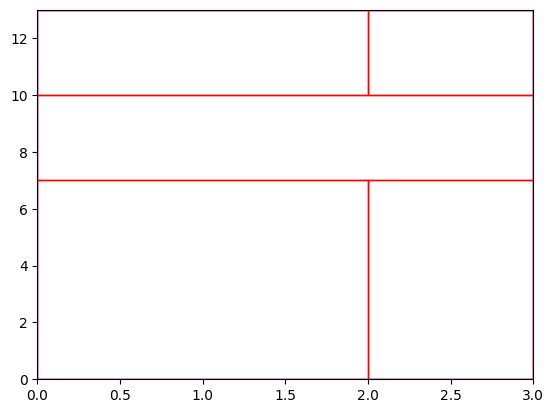

In [86]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def place_rectangles(rectangles, space_width, space_height):
    # Sort rectangles in decreasing order of area
    rectangles.sort(key=lambda rect: rect[0] * rect[1], reverse=True)

    # Initialize a list to store the positions of rectangles in the format (x, y, width, height)
    positions = []

    for rect in rectangles:
        width, height = rect
        position_found = False

        # Try to place the rectangle in the available space
        for x in range(space_width):
            for y in range(space_height):
                if all((x + width <= space_width, y + height <= space_height,
                        not any((x < px + pw and x + width > px and y < py + ph and y + height > py)
                                for px, py, pw, ph in positions))):
                    # Rectangle can be placed at this position
                    positions.append((x, y, width, height))
                    position_found = True
                    break

            if position_found:
                break

        # If no position is found for the current rectangle, exit and return None
        if not position_found:
            return None

    return positions

def plot_rectangles(rectangles, positions, space_width, space_height):
    fig, ax = plt.subplots()
    ax.set_xlim(0, space_width)
    ax.set_ylim(0, space_height)

    # Plot the large space
    ax.add_patch(patches.Rectangle((0, 0), space_width, space_height, linewidth=1, edgecolor='b', facecolor='none'))

    # Plot the rectangles
    for x, y, width, height in positions:
        
        ax.add_patch(patches.Rectangle((x, y), width, height, linewidth=1, edgecolor="r", facecolor='none'))

    plt.show()

# Example usage:
rectangles = [(2, 7), (1, 3), (1, 7), (3, 3),(2,3)]  # Example rectangles (width, height)
space_width = 3
space_height = 13

result = place_rectangles(rectangles, space_width, space_height)

if result:
    print("Feasible arrangement:")
    for x, y, width, height in result:
        print(f"Rectangle positions at (x: {x}, y: {y}) with width {width} and height {height}")

    # Plot the rectangles
    plot_rectangles(rectangles, result, space_width, space_height)
else:
    print("No feasible arrangement found.")
